<p> IDE: Colab </p>

In [8]:
import io,sys
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_datasets as tfds
from keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import warnings; warnings.simplefilter('ignore')

In [9]:
def get_batch_data ():

  (train_data,test_data),info = tfds.load ('imdb_reviews/subwords8k',split=(tfds.Split.TRAIN,tfds.Split.TEST),with_info=True,as_supervised=True)
  encoder = info.features['text'].encoder
  padded_shapes = ([None],())
  train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)
  test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)

  return train_batches,test_batches,encoder


In [10]:
def get_model (encoder, embedding_dim = 16):
  
  model = keras.Sequential ([layers.Embedding(encoder.vocab_size,embedding_dim),
                           layers.GlobalAveragePooling1D(),
                           layers.Dense(1,activation = 'sigmoid') ])
  model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])
  history = model.fit(train_batches,epochs=10, validation_data=test_batches,validation_steps=20)  
  return model


In [11]:
def plot_data (history) :
  
  history_dict = history.history
  acc = history_dict['accuracy']
  val_acc = history_dict ['accuracy']
  epochs = range (1,len (acc) + 1)
  plt.figure (figsize=(12,9))
  plt.figure (figsize=(12,9))
  plt.plot (epochs,acc,'bo',label='train acc')
  plt.plot (epochs, val_acc,'b', label = 'Validation acc')
  plt.title ('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel ('Accuracy')
  plt.legend (loc='lower right')
  plt.ylim ((0.5,1))
  plt.show ()

  return 

In [12]:
def retrieve_embeddings (model,encoder):
  out_vectors = io.open ('vecs.tsv','w',encoding = 'UTF-8')
  out_metadata =  io.open ('meta.tsv','w',encoding = 'UTF-8')
  weights = model.layers[0].get_weights()[0]

  for num,word in enumerate (encoder.subwords):
    vec = weights[num+1]
    out_metadata.write(word +'\n')
    out_vectors.write ('\t'.join([str(x) for x in vec ]) + '\n')
  out_metadata.close()
  out_vectors.close()
  
  return
  

In [13]:
train_batches, test_batches,encoder = get_batch_data()
model = get_model (encoder)
history = model.fit(train_batches,epochs=10, validation_data=test_batches,validation_steps=20)



Epoch 1/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.6313 - accuracy: 0.7012 - val_loss: 0.5650 - val_accuracy: 0.7600
Epoch 2/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.4587 - accuracy: 0.8437 - val_loss: 0.4544 - val_accuracy: 0.8400
Epoch 3/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.3591 - accuracy: 0.8802 - val_loss: 0.3423 - val_accuracy: 0.8550
Epoch 4/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.3033 - accuracy: 0.8984 - val_loss: 0.3215 - val_accuracy: 0.8800
Epoch 5/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2719 - accuracy: 0.9098 - val_loss: 0.3374 - val_accuracy: 0.8550
Epoch 6/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2486 - accuracy: 0.9168 - val_loss: 0.3950 - val_accuracy: 0.8400
Epoch 7/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2286 - accuracy: 0.9233 - val_loss: 0.3711 - val_ac

<Figure size 864x648 with 0 Axes>

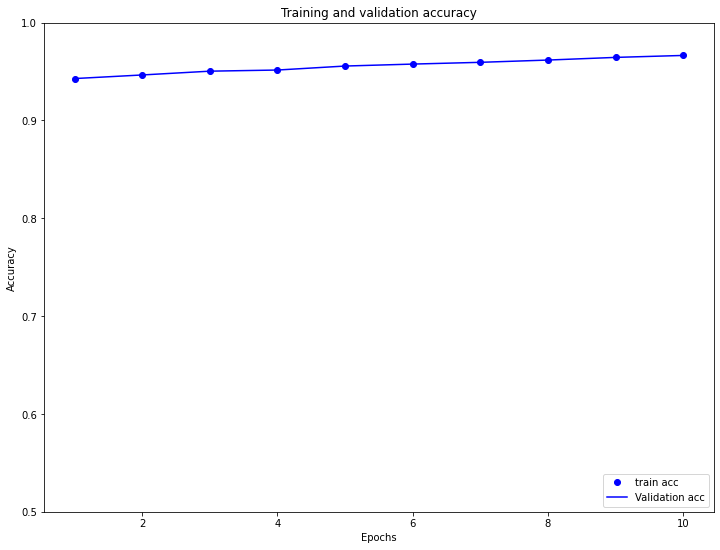

In [14]:
plot_data(history)


In [16]:
result=retrieve_embeddings (model,encoder)